### **Waffle Chart**

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from pywaffle import Waffle

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)


In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1, numeric_only=True)

In [4]:
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.**

In [5]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


Step 2. The second step is defining the overall size of the waffle chart.

In [6]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
plot_df = pd.DataFrame({"tile_num": tiles_per_category})

plot_df

Total number of tiles is 400.


,tile_num
Country,
Denmark,129
Norway,77
Sweden,194


**Setp 3: Plot the waaffle** 

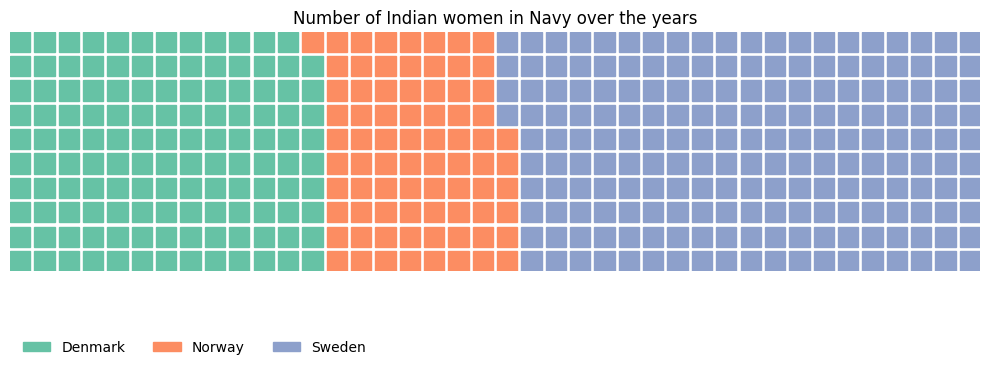

In [7]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,             #change number of rows here
    values=plot_df.tile_num,
    labels= list(plot_df.index),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(plot_df), 'framealpha': 0},
    title={
        'label': 'Number of Indian women in Navy over the years',
        'loc': 'center'
    },
    figsize= (10,8),
    
    ############ If set to vertical set the type of arragement ### 
    # vertical=True,
    # block_arranging_style='snake'
)


# Show the plot
plt.show()
	